# Leaf Disease Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 941.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 51.2 MB/s eta 0:00:00


### Importing libraries

In [2]:
import torch

In [3]:
torch.__version__

'2.0.0+cu118'

In [4]:
import fastai

In [5]:
fastai.__version__

'2.7.12'

In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

## Uploading the dataset of images

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [9]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:13<00:00, 261MB/s]
100% 2.70G/2.70G [00:13<00:00, 221MB/s]


## Unzipping the dataset

In [1]:
# !unzip \*.zip && rm *.zip

In [11]:
data_path = '/content/New Plant Diseases Dataset(Augmented)'

In [12]:
## Data preprocessing of images

tfms_item = RandomResizedCrop(128,min_scale=0.35)
tfms_batch = [Normalize.from_stats(*imagenet_stats)]

In [14]:
## Loading the data 

data = ImageDataLoaders.from_folder(data_path,item_tfms=tfms_item,
                                    batch_tfms = tfms_batch,
                                    valid_pct = 0.15, shuffle = True, device = torch.device('cuda'))

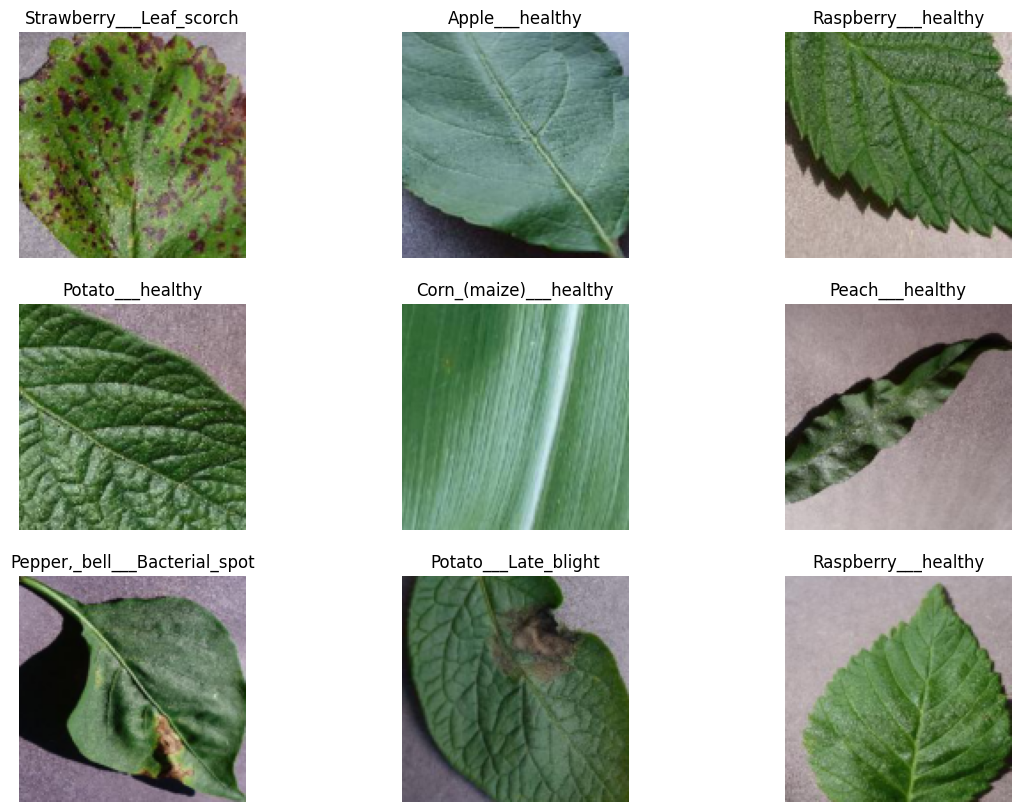

In [15]:
data.show_batch(figsize = (14,10))

In [16]:
print(f'Number of different classes in our data: {data.c}')

Number of classes 38


In [17]:
## We will use a cnn_learner model from fastai to help us in detection of leaves with diseases

model = cnn_learner(data, resnet101, metrics = accuracy, model_dir = '/tmp/model/')

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe222

In [18]:
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                        

SuggestedLRs(valley=0.0008317637839354575)

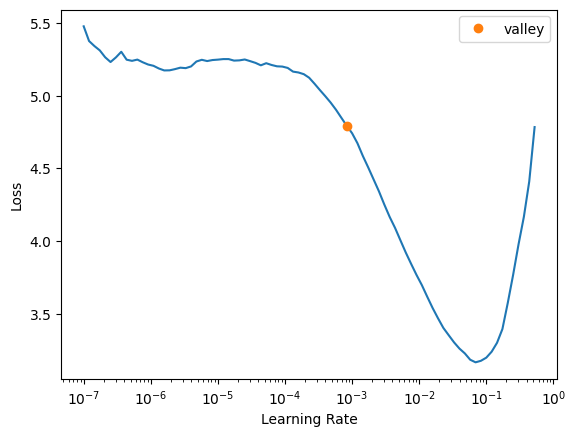

In [19]:
## Detecting the optimal learning rate for the model

model.lr_find()

In [20]:
model.fit_one_cycle(3,0.0008)

epoch,train_loss,valid_loss,accuracy,time
0,0.156608,0.092370,0.972231,06:35
1,0.073449,0.031451,0.990895,06:21
2,0.043829,0.019609,0.992337,06:24


In [21]:
model.save('Leaf_disease_model.pkl')

Path('/tmp/model/Python_D2_W11_CS.pkl.pth')

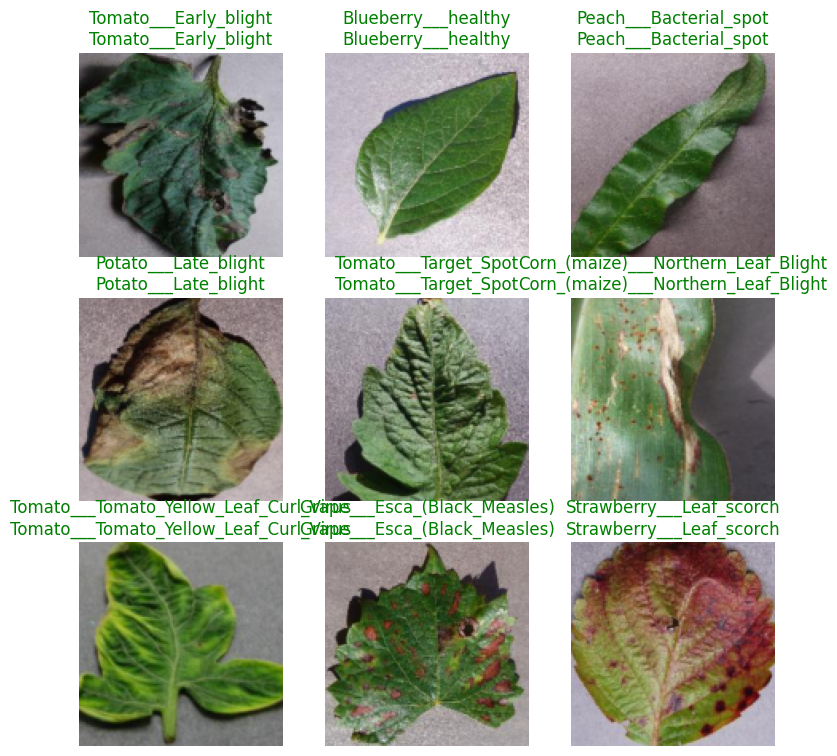

In [22]:
model.show_results()

In [23]:
interpretation = ClassificationInterpretation.from_learner(model)

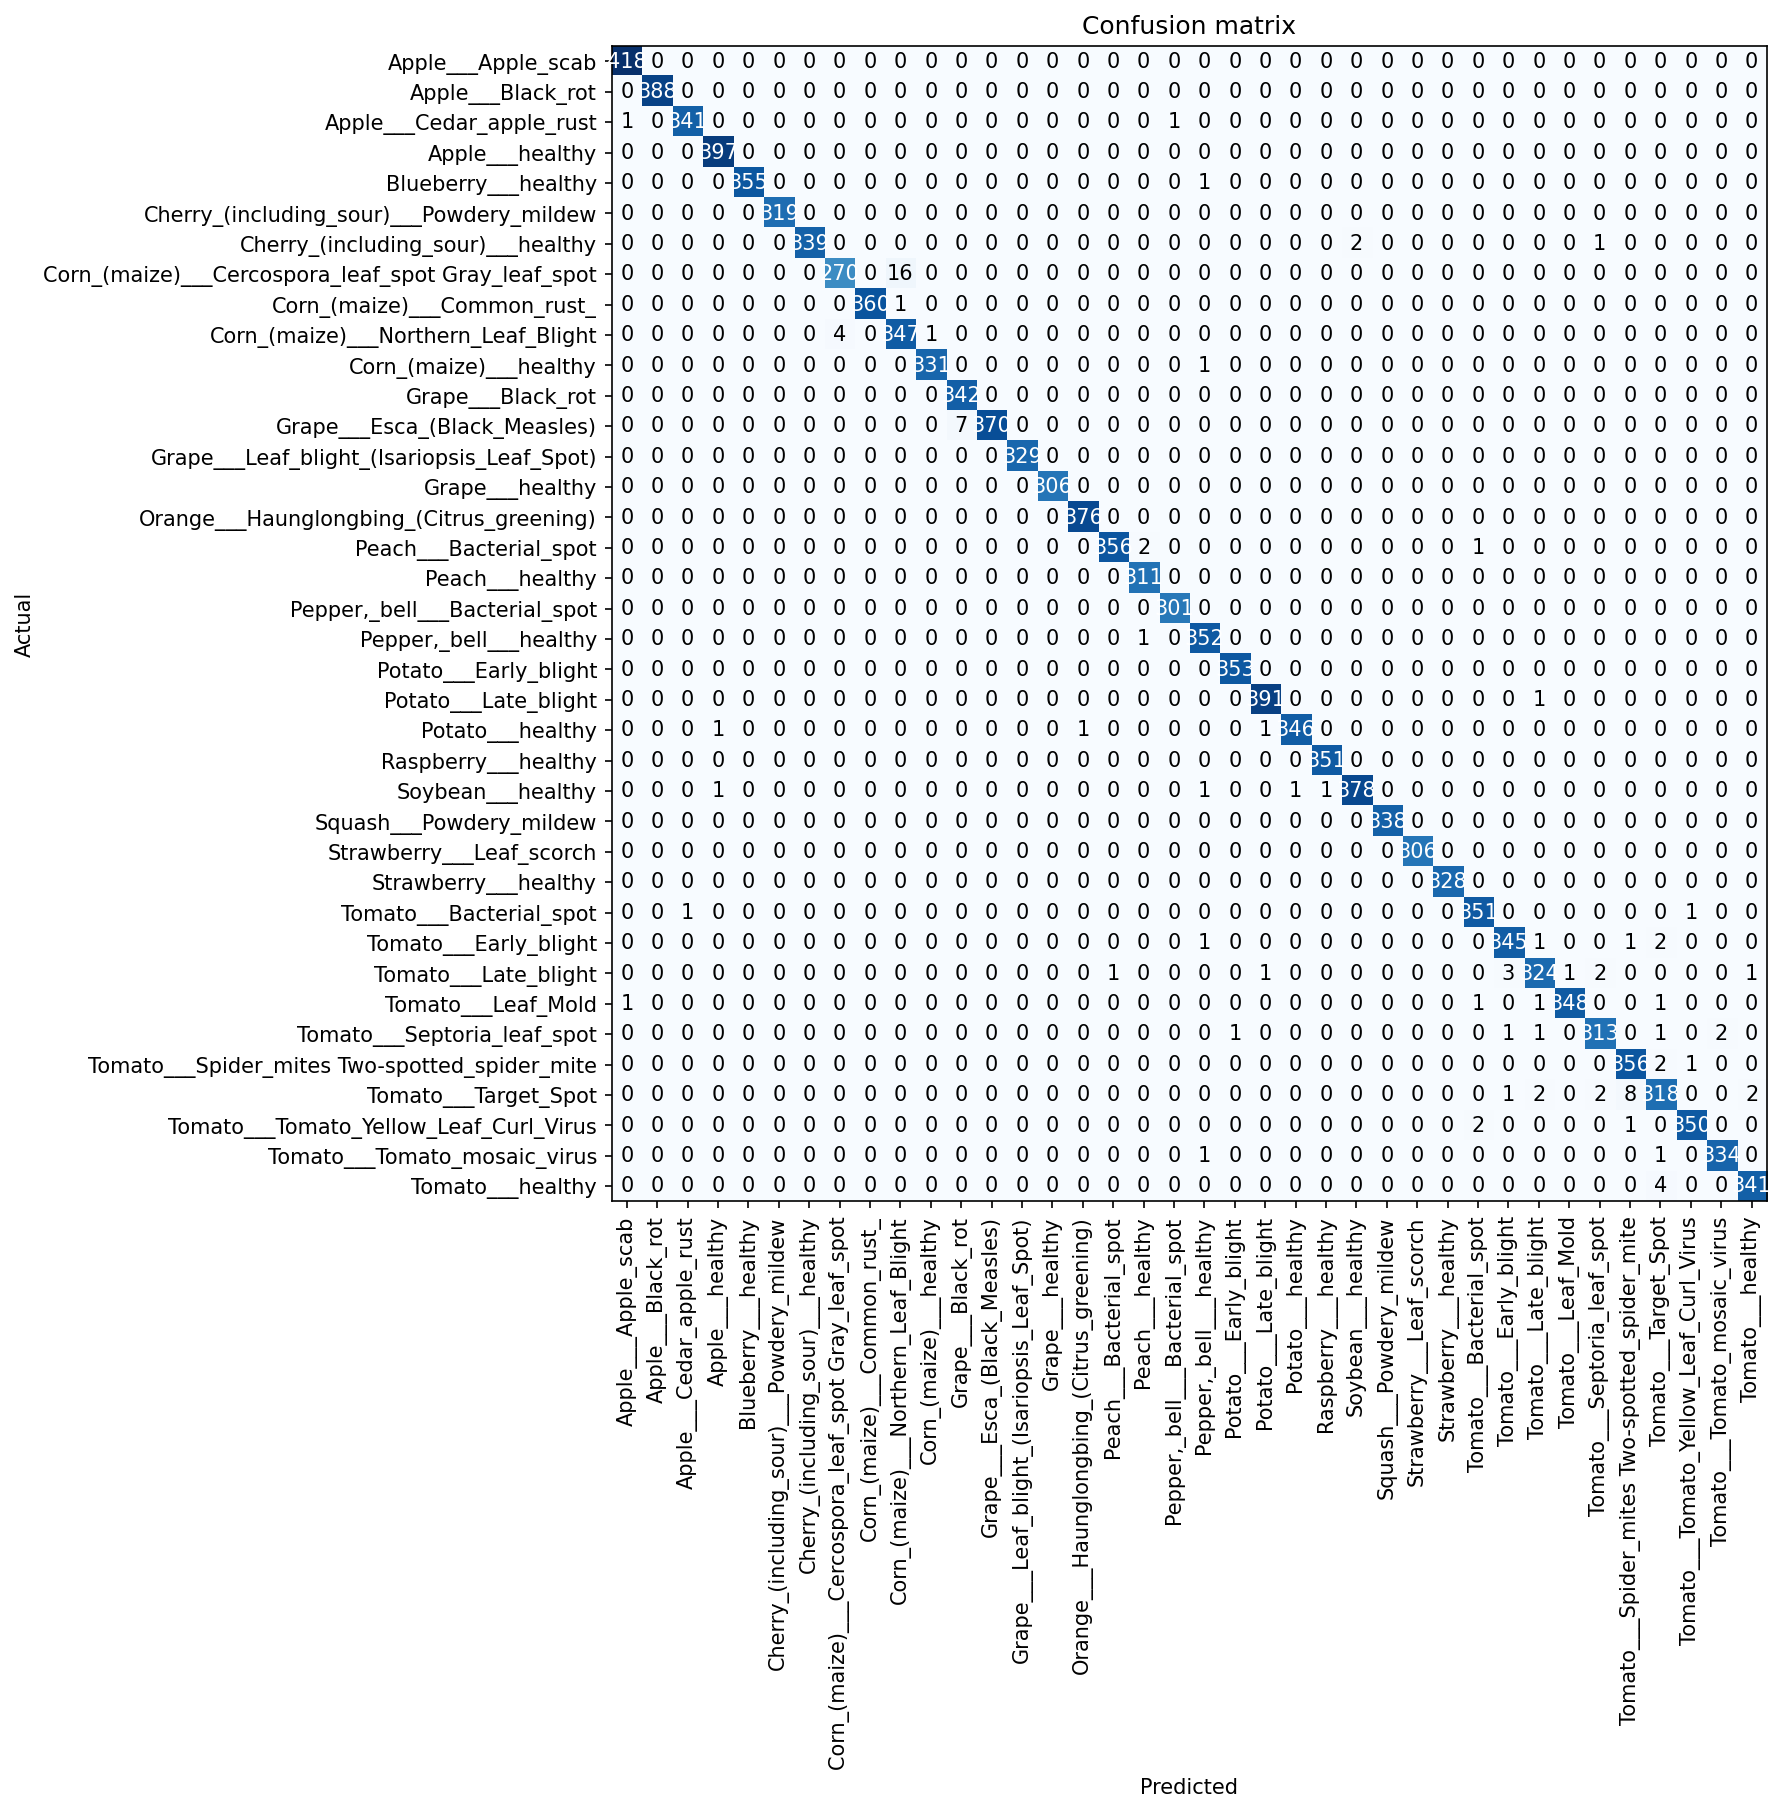

In [24]:
## Plotting the results into a confusion matrix to see how many classes were detected correctly

interpretation.plot_confusion_matrix(figsize = (12,12),dpi=150)

In [25]:
interpretation.most_confused(min_val = 2)

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  16),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 8),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 7),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  4),
 ('Tomato___healthy', 'Tomato___Target_Spot', 4),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 3),
 ('Cherry_(including_sour)___healthy', 'Soybean___healthy', 2),
 ('Peach___Bacterial_spot', 'Peach___healthy', 2),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 2),
 ('Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 2),
 ('Tomato___Target_Spot', 'Tomato___Late_blight', 2),
 ('Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Target_Spot', 'Tomato___healthy', 2),
 ('Tom

In [26]:
interp = Interpretation.from_learner(model)

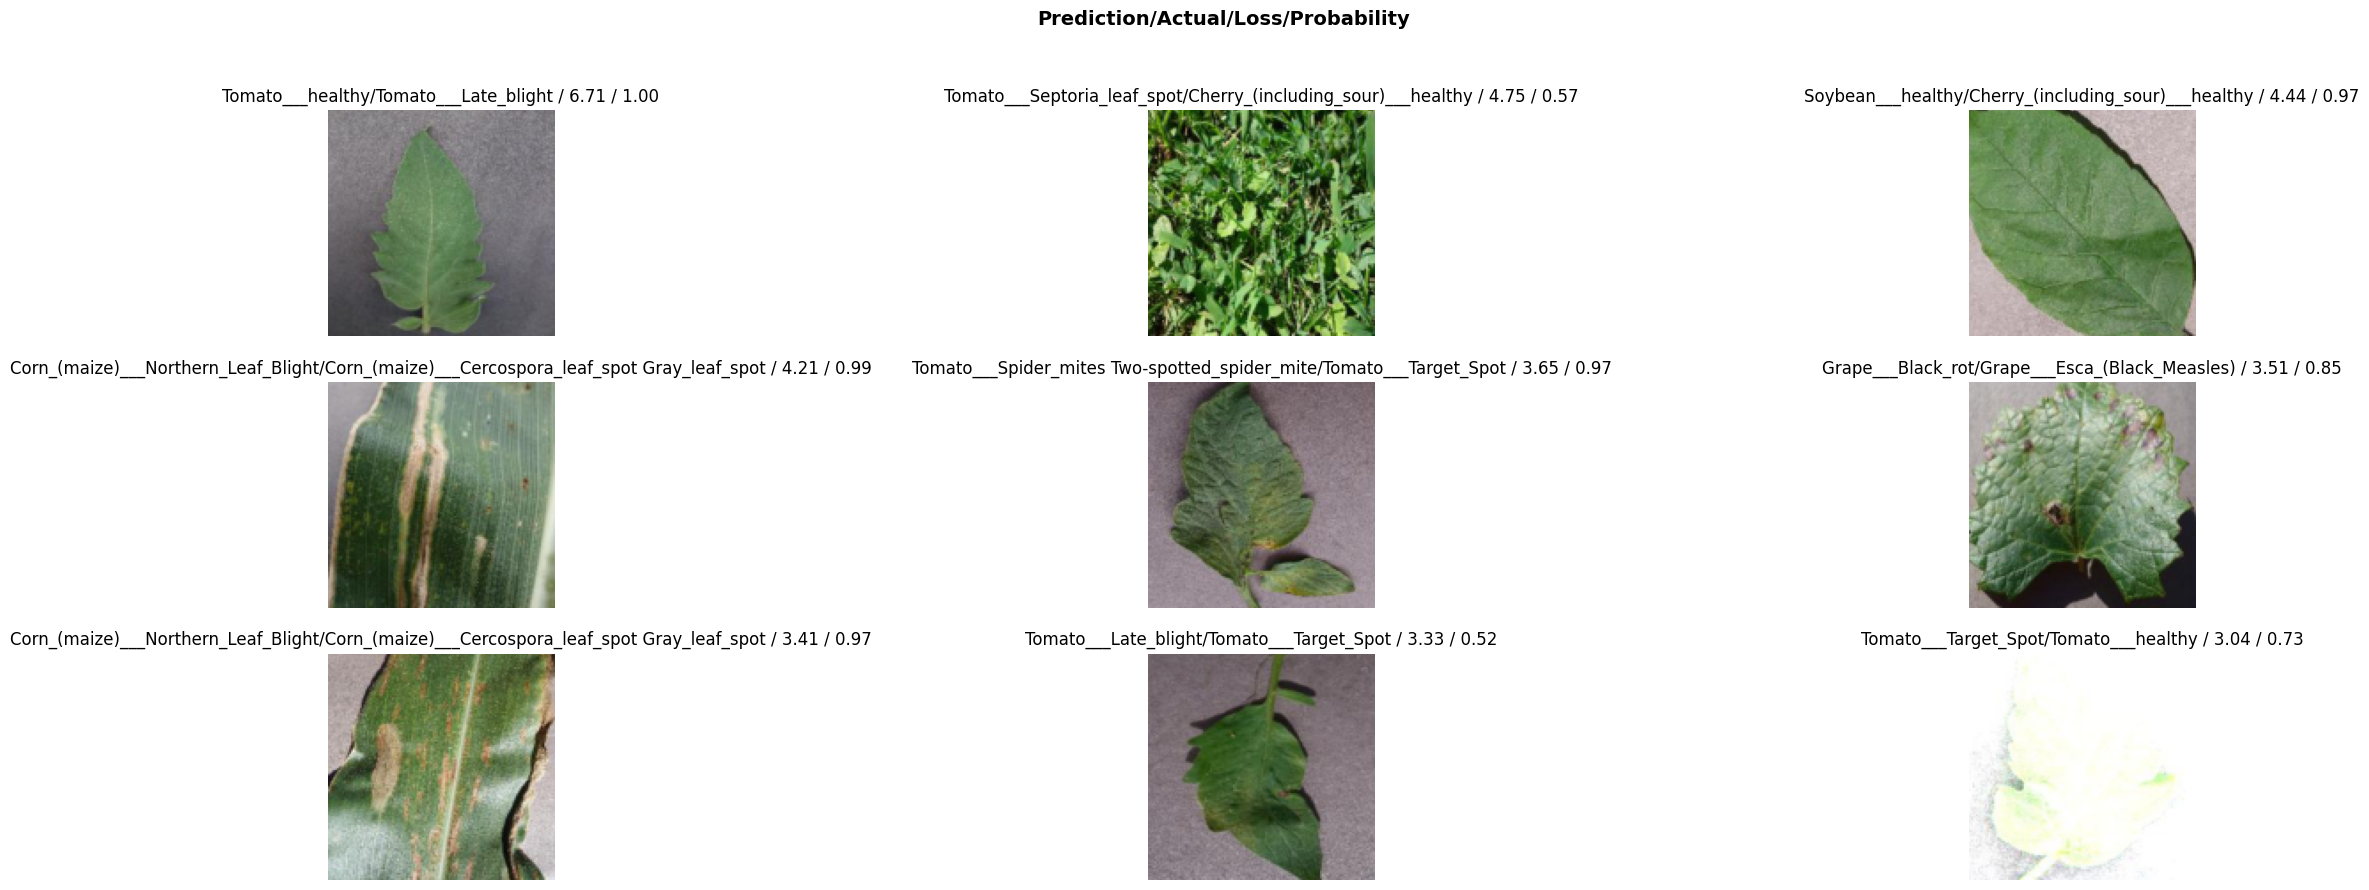

In [27]:
## Where the model made a wrong prediction

interp.plot_top_losses(k = 9,figsize = (30,10))